# Video Game Sales Analysis

## Setup

- Import Dataset
- Explore the dataset

Import the necessary libraries for this project

In [1]:
# import pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from scipy import stats

Load the dataset

In [2]:
df = pd.read_csv("./Dataset/Video_Games.csv")

Check the shape of the dataset and name of the columns

In [3]:
df.shape

(16928, 17)

In [4]:
df.columns

Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

Get the distnict values of the columns using unique() function

In [5]:
print(f"Unique values in Platform :" , df['Platform'].unique())
print('\n')

print(f"Unique values in Genre :" , df['Genre'].unique())
print('\n')

print(f"Unique values in Rating :" , df['Rating'].unique())

Unique values in Platform : ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Unique values in Genre : ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Unique values in Rating : ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Explore first five rows using head functions

In [6]:
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Check the data types of variables 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

Statistical summary of numerical variables

In [8]:
df.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16655.00000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,7718.000000
mean,8463.500000,2006.48532,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,163.269629
std,4886.837014,5.88289,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,562.786746
min,0.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4231.750000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8463.500000,2007.00000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,25.000000
75%,12695.250000,2010.00000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,82.000000
max,16927.000000,2020.00000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Statistical summary of categorical variables

In [9]:
df.describe(include=object)

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16926,16928,16926,16873,10159,10240,10092
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2188,3410,1389,2441,206,4043


## Data Preprocessing

- Check and process the null values
- Adjust the data types

Change data type of User Score from object to float

In [10]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

Check number of missing values of each columns

In [11]:
df.isna().sum()

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         9210
User_Count         9210
Developer          6688
Rating             6836
dtype: int64

Drop the unncessary columns and NA values of specific columns (Name and Year of Release)

In [12]:
df = df.dropna(subset = ["Name", "Year_of_Release", "Publisher"])

Check the number of duplicated rows

In [13]:
duplicates = df.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 0


# EDA

### Explore Baisc Information of the Dataset

Distribution of Genres with pie chart

In [32]:
# Count each genres
genre_counts = df['Genre'].value_counts()

# Create a pie chart
fig = px.pie(
    values=genre_counts.values,
    names=genre_counts.index,
    title='Distribution of Game Genres', 
    width=800,  
    height=600,  
)


fig.show()

Count plot of the rating values

<AxesSubplot:xlabel='Rating', ylabel='count'>

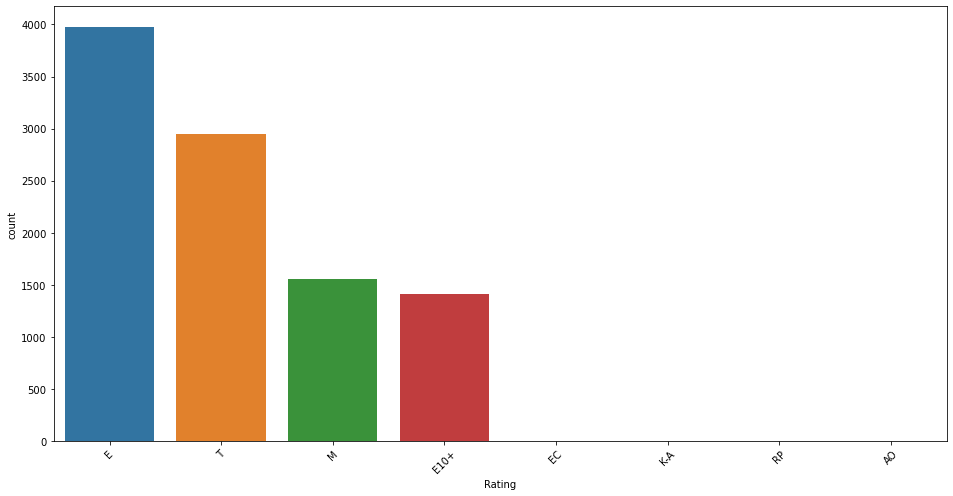

In [15]:
# Design
plt.figure(figsize = (16,8))
plt.xticks(rotation=45)

# Create countplot
sns.countplot(x = 'Rating' , data=df, order = df['Rating'].value_counts().index)

Number of release for each year

In [16]:
# Calculate the number of releases for each year
year_counts = df['Year_of_Release'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year_of_Release', 'count']

# Create an bar plot
fig = px.bar(year_counts, x='Year_of_Release', y='count', title='Number of Entries per Year', color_discrete_sequence=['#636EFA'])
fig.show()

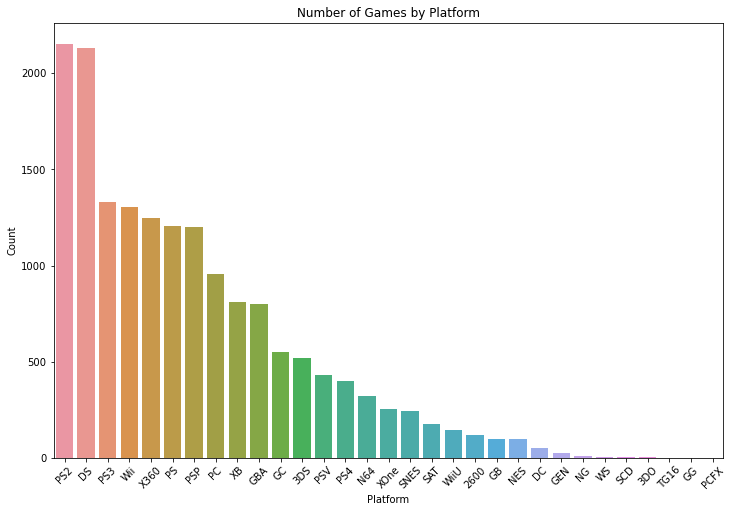

In [17]:

# Order of the platforms by counts
platform_order = df['Platform'].value_counts().index

# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Platform', order=platform_order)

# Design labels
plt.title('Number of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

### Anlaysis on Sales

Which platform shows the highest sales?

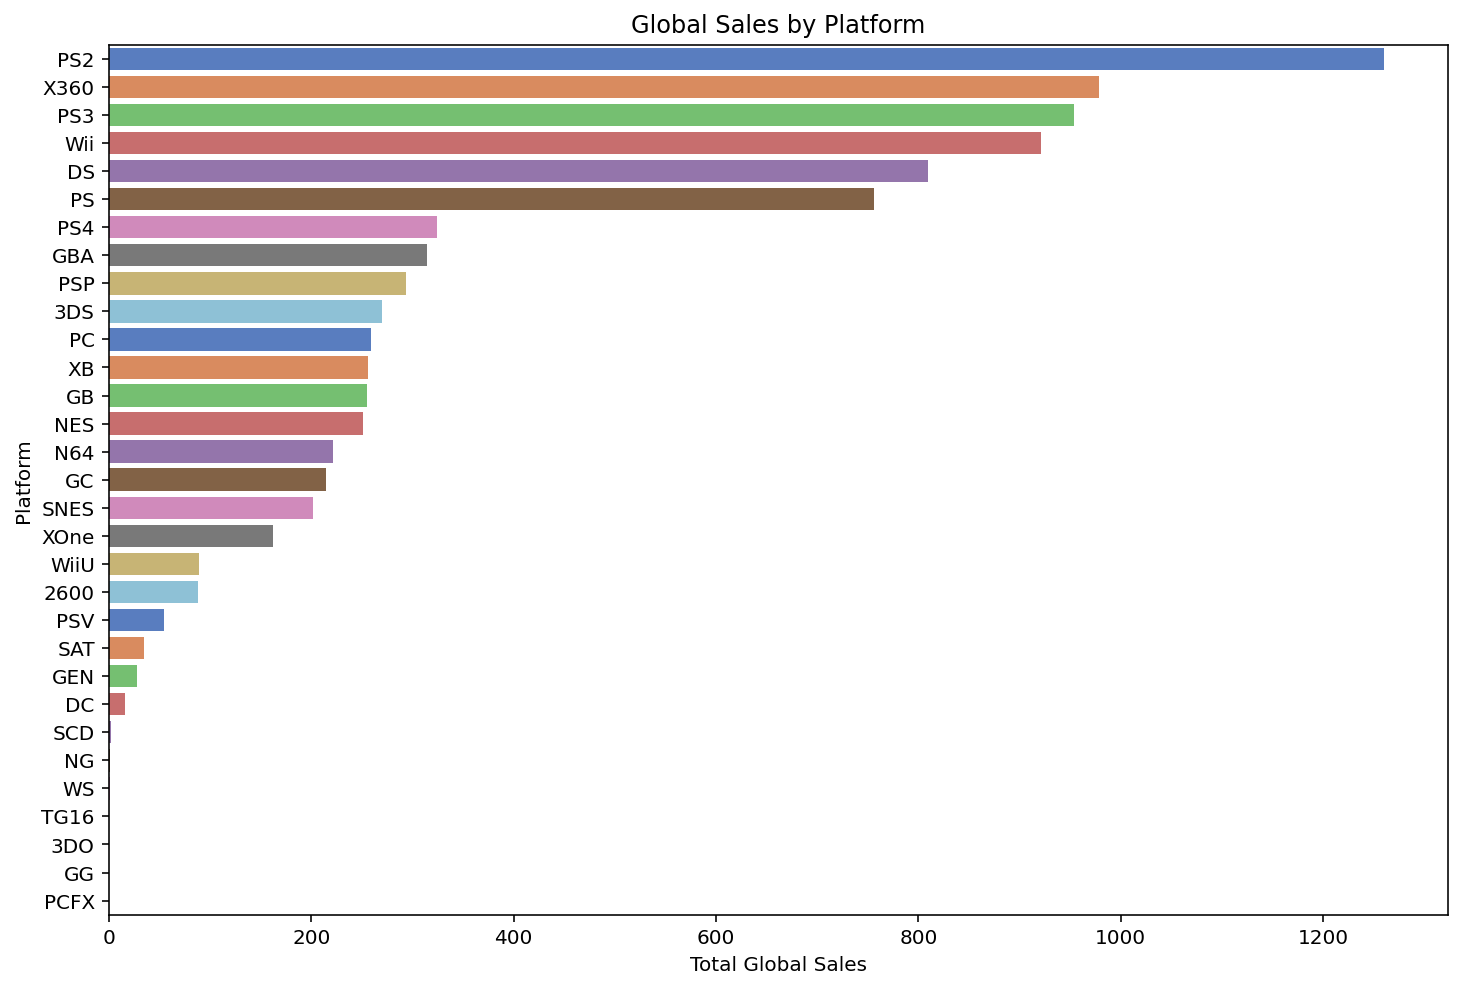

In [18]:
# Calculate the global sales by platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sort the platforms by sales
platform_sales_sorted = platform_sales.sort_values('Global_Sales', ascending=False)

# Change plot to High Definition
%config InlineBackend.figure_format = 'retina'

# Create a barplot with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Global_Sales', y='Platform', data=platform_sales_sorted, ci=None, palette='muted')

# Adding titles and labels
plt.title('Global Sales by Platform')
plt.xlabel('Total Global Sales')
plt.ylabel('Platform')

plt.show()

Which genre shows the highest sales?

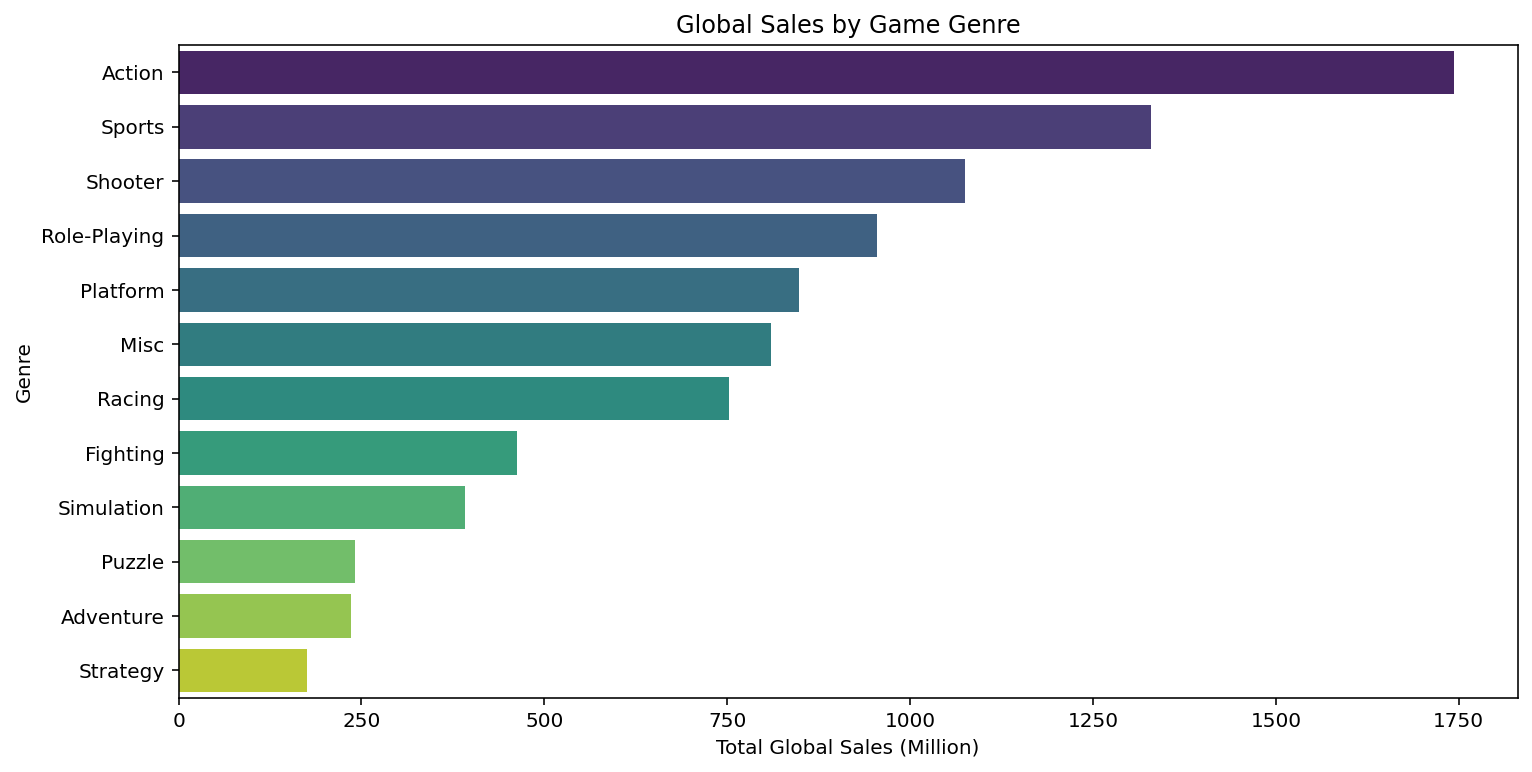

In [19]:
# Calculation of Sales by Genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort the DataFrame based on 'Global_Sales' with descending order
genre_sales_sorted = genre_sales.sort_values('Global_Sales', ascending=False)

plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(
    data=genre_sales_sorted,
    x='Global_Sales',
    y='Genre',
    palette='viridis' 
)

plt.title('Global Sales by Game Genre')
plt.xlabel('Total Global Sales (Million)')
plt.ylabel('Genre')


plt.show()

Distribution of sales by genre in 3 top sales years

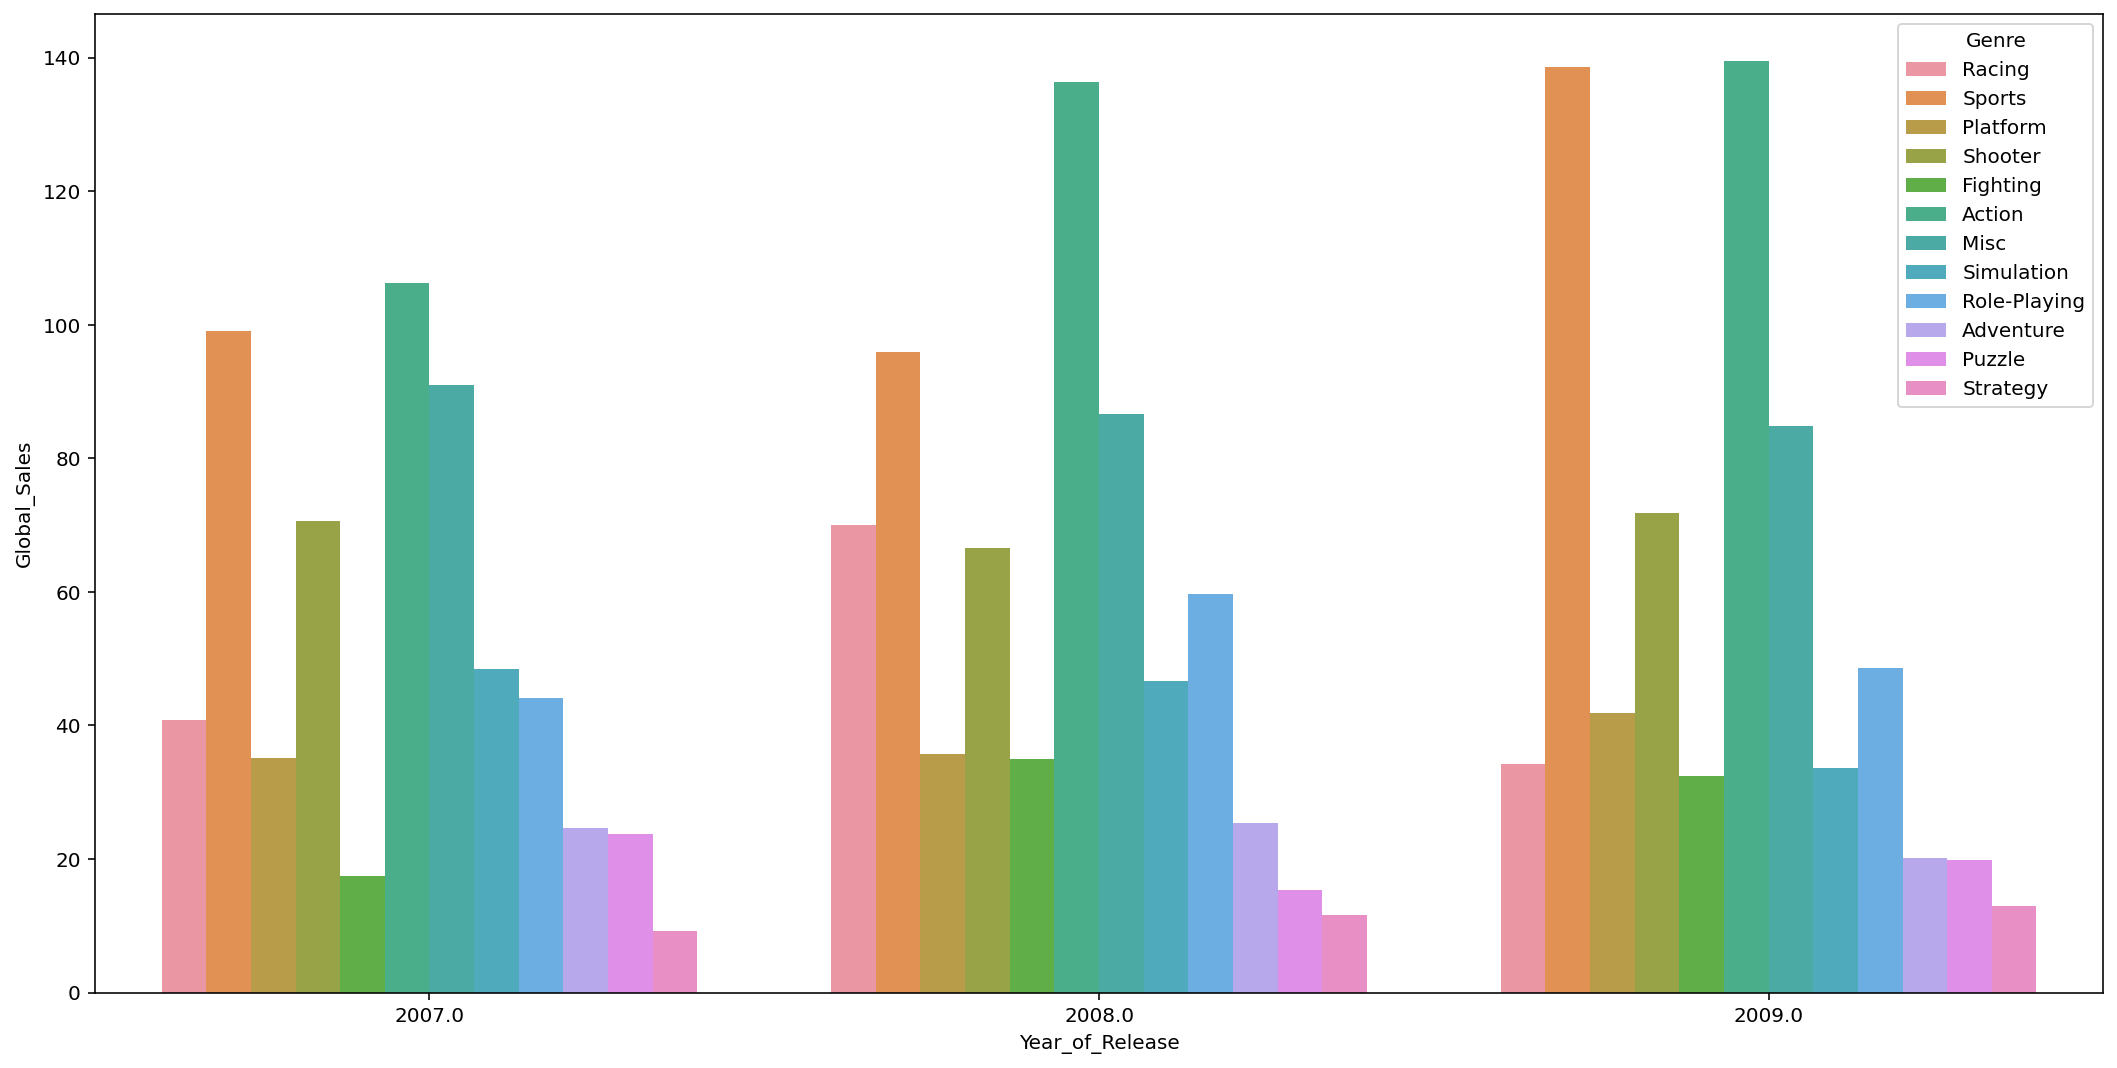

In [25]:
# Calcuation of Top 3 years by sales
top_years = df.groupby('Year_of_Release')['Global_Sales'].sum().sort_values(ascending=False).head(3).index

# Filter data for only top 3 years by sales
top_years_df = df[df['Year_of_Release'].isin(top_years)]

plt.figure(figsize=(18, 9))

# Create a bar plot
sns.barplot(
    data=top_years_df,
    x='Year_of_Release',
    y='Global_Sales',
    hue='Genre',
    estimator=sum,
    ci=None,
)

plt.show()

Which region and year shows the highest sales?

In [21]:
# Yearly sales calculation
yearly_sales = df.groupby('Year_of_Release').sum().reset_index()

# Create traces for each region's sales

na_sales_trace = go.Scatter(
    x=yearly_sales['Year_of_Release'],
    y=yearly_sales['NA_Sales'],
    mode='lines+markers',
    name='NA Sales'
)


eu_sales_trace = go.Scatter(
    x=yearly_sales['Year_of_Release'],
    y=yearly_sales['EU_Sales'],
    mode='lines+markers',
    name='EU Sales'
)

jp_sales_trace = go.Scatter(
    x=yearly_sales['Year_of_Release'],
    y=yearly_sales['JP_Sales'],
    mode='lines+markers',
    name='JP Sales'
)

global_sales_trace = go.Scatter(
    x=yearly_sales['Year_of_Release'],
    y=yearly_sales['Global_Sales'],
    mode='lines+markers',
    name='Global Sales'
)

fig = go.Figure()

fig.add_trace(na_sales_trace)
fig.add_trace(eu_sales_trace)
fig.add_trace(jp_sales_trace)
fig.add_trace(global_sales_trace)

# Add title and labels
fig.update_layout(
    title='Yearly Sales by Region',
    xaxis_title='Release Year',
    yaxis_title='Sales',
    hovermode='x unified'
)


fig.show()

Correlation between Global Sales and other factors

In [22]:
# Cacluate the correlations of the columns
correlation_matrix = df[["Global_Sales", 'Critic_Score', 'User_Score', 'Critic_Count', 'User_Count']].corr()

# Show the Heatmap
px.imshow(correlation_matrix, text_auto = '.2f', color_continuous_scale = 'Purp')

Relatinoship between Global Sales and Critic Score

In [23]:
# Function for removing outlier
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers 
filtered_df = remove_outliers(df, 'Critic_Score')
filtered_df = remove_outliers(filtered_df, 'Global_Sales')

# Create Scatter plot
fig = px.scatter(
    data_frame=filtered_df,
    x='Critic_Score',
    y='Global_Sales',
    trendline='ols', 
    width=700,
    height=700
)

# Update Layout
fig.update_layout(
    title='Critic Score vs Global Sales without Outliers',
    xaxis_title='Critic Score',
    yaxis_title='Global Sales',
)

# Update color of the ols trendline
fig.update_traces(name='trendline', line=dict(color='red'))

fig.show()